## Merging schedule.csv, merged_master_app.csv, and tbl_schedule.csv

Merging all four files together. Please note that merged_master_app already took care of master and application files.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('precision', 5)

In [2]:
path = '/data/Dropbox/Data/Asylum_Courts/raw'

In [3]:
master_app = pd.read_csv('merged_master_app.csv')

In [4]:
master_app.head(5)

,idnproceeding,idnProceedingAppln,idncase,Appl_Code,Appl_Recd_Date,Appl_Dec,numAppsPerProc,dec,osc_date,comp_date,tracid,nat
0,85.0,43,3328111.0,ASYL,1995-04-02 00:00:00,D,3.0,DENY,1994-11-04,1997-06-16,71.0,HO
1,103.0,49,3328153.0,ASYL,1995-05-05 00:00:00,G,2.0,GRANT,1994-11-05,1995-08-08,139.0,GT
2,111.0,52,3328175.0,ASYL,1995-03-31 00:00:00,D,3.0,DENY,1994-11-05,1995-08-15,70.0,ES
3,136.0,56,3327844.0,ASYL,1995-03-06 00:00:00,D,3.0,DENY,1995-02-06,1995-04-06,50.0,HO
4,139.0,58,3327852.0,ASYL,1996-05-14 00:00:00,G,2.0,GRANT,1995-02-06,1996-05-14,126.0,CU


In [5]:
master_app.count()

idnproceeding         597522
idnProceedingAppln    597522
idncase               597522
Appl_Code             597522
Appl_Recd_Date        597521
Appl_Dec              597522
numAppsPerProc        597522
dec                   597522
osc_date              597522
comp_date             597522
tracid                597522
nat                   597522
dtype: int64

In [6]:
# renaming variables 
master_app = master_app.rename(columns={"idncase_x":"idncase", "Appl_Recd_Date":"appl_recd_date", "Appl_Dec":"appl_dec"})

In [7]:
master_app = master_app.drop('idnProceedingAppln', axis=1)

In [8]:
# dropping columns I don't need here
master_app = master_app.drop(columns=['appl_dec', 'Appl_Code'], axis=1)
master_app.head(5)

,idnproceeding,idncase,appl_recd_date,numAppsPerProc,dec,osc_date,comp_date,tracid,nat
0,85.0,3328111.0,1995-04-02 00:00:00,3.0,DENY,1994-11-04,1997-06-16,71.0,HO
1,103.0,3328153.0,1995-05-05 00:00:00,2.0,GRANT,1994-11-05,1995-08-08,139.0,GT
2,111.0,3328175.0,1995-03-31 00:00:00,3.0,DENY,1994-11-05,1995-08-15,70.0,ES
3,136.0,3327844.0,1995-03-06 00:00:00,3.0,DENY,1995-02-06,1995-04-06,50.0,HO
4,139.0,3327852.0,1996-05-14 00:00:00,2.0,GRANT,1995-02-06,1996-05-14,126.0,CU


In [9]:
sched = pd.read_csv(path + '/schedule.csv', low_memory=False)

In [10]:
sched.head(5)

,idnschedule,idncase,idnproceeding,adj_medium,schedule_type,adj_date
0,1824128,2990069.0,1324191,NaN,--,05APR2000
1,1824130,2989583.0,1324273,NaN,--,07DEC1998
2,1824131,2989777.0,1324323,P,--,22FEB1999
3,1824132,2989998.0,1324391,NaN,--,05SEP1997
4,1824132,2990058.0,1324405,NaN,--,22DEC1999


In [11]:
sched.count()

idnschedule      15377519
idncase          15377502
idnproceeding    15377519
adj_medium        8825704
schedule_type    15377519
adj_date         15377519
dtype: int64

In [12]:
sched['adj_date'] = sched['adj_date'].astype('str')
# delete dates invalid formats
sched = sched[sched['adj_date'].apply(lambda x: len(x) == 9)] 
sched['adj_date'] = pd.to_datetime(sched['adj_date'], format='%d%b%Y')

In [13]:
tbl_sched = pd.read_csv('../detailed_schedule.csv', low_memory=False)

In [14]:
tbl_sched.head(5)

,idnschedule,idnproceeding,idncase,osc_date,ij_code,cal_type,adj_date,adj_rsn,notice_code,eoirattorneyid,adj_time_start2,adj_time_stop2,durationHearing
0,17035561,961394.0,2706979,1995-06-30 00:00:00,LIS,M,1996-11-27 00:00:00,01,NaN,{64B26B92-3683-E211-AC6D-F4CE46838609},1996-11-27 13:00:00,1996-11-27 14:30:00,90.0
1,17035562,961398.0,2706991,1991-01-18 00:00:00,LIS,M,1991-05-21 00:00:00,14,NaN,NaN,1991-05-21 08:30:00,1991-05-21 09:00:00,30.0
2,17035563,961402.0,2707014,1995-05-17 00:00:00,BWD,M,1997-04-02 00:00:00,NaN,NaN,{50B26B92-3683-E211-AC6D-F4CE46838609},1997-04-02 13:00:00,1997-04-02 16:30:00,210.0
3,17035564,961405.0,2707014,1995-05-17 00:00:00,PS,M,1996-04-16 00:00:00,NaN,NaN,{50B26B92-3683-E211-AC6D-F4CE46838609},1996-04-16 09:00:00,1996-04-16 10:30:00,90.0
4,17035565,961406.0,2707020,1996-03-12 00:00:00,ECK,I,2003-01-08 00:00:00,04,NaN,{5E250E92-3683-E211-AC6D-F4CE46838609},2003-01-08 13:00:00,2003-01-08 16:00:00,180.0


In [15]:
tbl_sched['adj_date'] = pd.to_datetime(tbl_sched['adj_date'])

In [16]:
tbl_sched.count()

idnschedule        6725773
idnproceeding      6725773
idncase            6725773
osc_date           6725281
ij_code            6724457
cal_type           6721462
adj_date           6725773
adj_rsn            6020701
notice_code        5422749
eoirattorneyid     3618298
adj_time_start2    6725773
adj_time_stop2     6725773
durationHearing    6725773
dtype: int64

In [17]:
# merging master_app.csv with schedule.csv
merged_sched_master = pd.merge(master_app, sched, on=['idncase', 'idnproceeding'])
merged_sched_master.count()

idnproceeding     2490143
idncase           2490143
appl_recd_date    2490137
numAppsPerProc    2490143
dec               2490143
osc_date          2490143
comp_date         2490143
tracid            2490143
nat               2490143
idnschedule       2490143
adj_medium        1348305
schedule_type     2490143
adj_date          2490143
dtype: int64

In [18]:
# doing a left join-- this shows ~1000 applications didn't have hearings 
test = pd.merge(master_app, sched, on=['idncase', 'idnproceeding'], how='left')
test.count()

idnproceeding     2491183
idncase           2491183
appl_recd_date    2491177
numAppsPerProc    2491183
dec               2491183
osc_date          2491183
comp_date         2491183
tracid            2491183
nat               2491183
idnschedule       2490143
adj_medium        1348305
schedule_type     2490143
adj_date          2490143
dtype: int64

In [19]:
# checking merged dataframe
merged_sched_master.head(5)

,idnproceeding,idncase,appl_recd_date,numAppsPerProc,dec,osc_date,comp_date,tracid,nat,idnschedule,adj_medium,schedule_type,adj_date
0,85,3328111.0,1995-04-02 00:00:00,3.0,DENY,1994-11-04,1997-06-16,71.0,HO,1391628,NaN,--,1995-02-07
1,85,3328111.0,1995-04-02 00:00:00,3.0,DENY,1994-11-04,1997-06-16,71.0,HO,1392549,NaN,--,1997-06-16
2,85,3328111.0,1995-04-02 00:00:00,3.0,DENY,1994-11-04,1997-06-16,71.0,HO,1393329,NaN,--,1995-04-03
3,85,3328111.0,1995-04-02 00:00:00,3.0,DENY,1994-11-04,1997-06-16,71.0,HO,1393961,NaN,--,1996-03-08
4,85,3328111.0,1995-04-02 00:00:00,3.0,DENY,1994-11-04,1997-06-16,71.0,HO,1394593,NaN,--,1996-08-19


In [20]:
# merging with tbl_schedule.csv
merged_sched_master = pd.merge(merged_sched_master, tbl_sched, on=['idncase', 'idnproceeding', 'adj_date'], how='left')
merged_sched_master.count()

idnproceeding      2580435
idncase            2580435
appl_recd_date     2580429
numAppsPerProc     2580435
dec                2580435
osc_date_x         2580435
comp_date          2580435
tracid             2580435
nat                2580435
idnschedule_x      2580435
adj_medium         1434409
schedule_type      2580435
adj_date           2580435
idnschedule_y      1140968
osc_date_y         1140966
ij_code            1140873
cal_type           1140734
adj_rsn            1013487
notice_code         639355
eoirattorneyid      781697
adj_time_start2    1140968
adj_time_stop2     1140968
durationHearing    1140968
dtype: int64

In [21]:
merged_sched_master.head(10)

,idnproceeding,idncase,appl_recd_date,numAppsPerProc,dec,osc_date_x,comp_date,tracid,nat,idnschedule_x,...,idnschedule_y,osc_date_y,ij_code,cal_type,adj_rsn,notice_code,eoirattorneyid,adj_time_start2,adj_time_stop2,durationHearing
0,85,3.3281e+06,1995-04-02 00:00:00,3.0,DENY,1994-11-04,1997-06-16,71.0,HO,1391628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,85,3.3281e+06,1995-04-02 00:00:00,3.0,DENY,1994-11-04,1997-06-16,71.0,HO,1392549,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,85,3.3281e+06,1995-04-02 00:00:00,3.0,DENY,1994-11-04,1997-06-16,71.0,HO,1393329,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,85,3.3281e+06,1995-04-02 00:00:00,3.0,DENY,1994-11-04,1997-06-16,71.0,HO,1393961,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,85,3.3281e+06,1995-04-02 00:00:00,3.0,DENY,1994-11-04,1997-06-16,71.0,HO,1394593,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,85,3.3281e+06,1995-04-02 00:00:00,3.0,DENY,1994-11-04,1997-06-16,71.0,HO,1395237,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,103,3.3282e+06,1995-05-05 00:00:00,2.0,GRANT,1994-11-05,1995-08-08,139.0,GT,1800161,...,18001619.0,1994-11-05 00:00:00,JSC,M,17,NaN,{9998B891-3683-E211-AC6D-F4CE46838609},1995-04-05 09:00:00,1995-04-05 09:30:00,30.0
7,103,3.3282e+06,1995-05-05 00:00:00,2.0,GRANT,1994-11-05,1995-08-08,139.0,GT,1820646,...,18206466.0,1994-11-05 00:00:00,JSC,I,NaN,NaN,{9998B891-3683-E211-AC6D-F4CE46838609},1995-08-08 09:00:00,1995-08-08 10:30:00,90.0
8,103,3.3282e+06,1995-05-05 00:00:00,2.0,GRANT,1994-11-05,1995-08-08,139.0,GT,1766922,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,111,3.3282e+06,1995-03-31 00:00:00,3.0,DENY,1994-11-05,1995-08-15,70.0,ES,1364892,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Generating number of "hearings per proceeding" feature

In [22]:
merged_sched_master['numHearingsPerProc'] = 1
# adding additional feature based on how many hearings have been scheduled for the same (idnCase, idnProceeding) pair
merged_sched_master['numHearingsPerProc'] = merged_sched_master.groupby(['idncase', 'idnproceeding'])['numHearingsPerProc'].transform('count')

In [23]:
merged_sched_master.head(5)

,idnproceeding,idncase,appl_recd_date,numAppsPerProc,dec,osc_date_x,comp_date,tracid,nat,idnschedule_x,...,osc_date_y,ij_code,cal_type,adj_rsn,notice_code,eoirattorneyid,adj_time_start2,adj_time_stop2,durationHearing,numHearingsPerProc
0,85,3.3281e+06,1995-04-02 00:00:00,3.0,DENY,1994-11-04,1997-06-16,71.0,HO,1391628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1,85,3.3281e+06,1995-04-02 00:00:00,3.0,DENY,1994-11-04,1997-06-16,71.0,HO,1392549,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
2,85,3.3281e+06,1995-04-02 00:00:00,3.0,DENY,1994-11-04,1997-06-16,71.0,HO,1393329,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
3,85,3.3281e+06,1995-04-02 00:00:00,3.0,DENY,1994-11-04,1997-06-16,71.0,HO,1393961,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
4,85,3.3281e+06,1995-04-02 00:00:00,3.0,DENY,1994-11-04,1997-06-16,71.0,HO,1394593,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6


## Generationg "number of days between first and last hearing" feature

In [24]:
merged_sched_master = merged_sched_master.sort_values(['idnproceeding','adj_date']).reset_index()

In [25]:
merged_sched_master["durationFirstLastHearing"]= merged_sched_master.groupby(['idncase', 'idnproceeding'])['adj_date'].transform(lambda x: x.iloc[-1] - x.iloc[0]).dt.days

In [26]:
# this shows that many proceedings spanned an unreasonable amount of time (in days)
merged_sched_master.sort_values(['durationFirstLastHearing', 'idnproceeding', 'adj_date'], ascending=False).head(20)

,index,idnproceeding,idncase,appl_recd_date,numAppsPerProc,dec,osc_date_x,comp_date,tracid,nat,...,ij_code,cal_type,adj_rsn,notice_code,eoirattorneyid,adj_time_start2,adj_time_stop2,durationHearing,numHearingsPerProc,durationFirstLastHearing
430635,430634,1.3406e+06,3.0037e+06,1995-12-20 00:00:00,2.0,DENY,1995-12-06,1996-04-25,243.0,GT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,13345
430634,430635,1.3406e+06,3.0037e+06,1995-12-20 00:00:00,2.0,DENY,1995-12-06,1996-04-25,243.0,GT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,13345
2380780,2380780,5.0999e+06,6.1803e+06,2010-06-15 00:00:00,3.0,DENY,1986-09-28,2011-02-11,211.0,ES,...,VJ1,M,8A,N6,{ACC65F91-3683-E211-AC6D-F4CE46838609},2011-04-01 13:00:00,2011-04-01 13:30:00,30.0,62,8795
2380779,2380779,5.0999e+06,6.1803e+06,2010-06-15 00:00:00,3.0,DENY,1986-09-28,2011-02-11,211.0,ES,...,KJ,I,24,V3,{ACC65F91-3683-E211-AC6D-F4CE46838609},2011-02-04 09:30:00,2011-02-04 12:00:00,150.0,62,8795
2380778,2380778,5.0999e+06,6.1803e+06,2010-06-15 00:00:00,3.0,DENY,1986-09-28,2011-02-11,211.0,ES,...,KJ,M,22,V3,{ACC65F91-3683-E211-AC6D-F4CE46838609},2010-06-15 13:00:00,2010-06-15 13:30:00,30.0,62,8795
2380777,2380777,5.0999e+06,6.1803e+06,2010-06-15 00:00:00,3.0,DENY,1986-09-28,2011-02-11,211.0,ES,...,KJ,M,05,3A,NaN,2010-05-25 13:30:00,2010-05-25 14:00:00,30.0,62,8795
2380776,2380776,5.0999e+06,6.1803e+06,2010-06-15 00:00:00,3.0,DENY,1986-09-28,2011-02-11,211.0,ES,...,KJ,M,14,V3,NaN,2010-05-18 13:30:00,2010-05-18 14:00:00,30.0,62,8795
2380772,2380740,5.0999e+06,6.1803e+06,2010-06-15 00:00:00,3.0,DENY,1986-09-28,2011-02-11,211.0,ES,...,KJ,I,8A,N6,{ACC65F91-3683-E211-AC6D-F4CE46838609},2010-01-25 13:00:00,2010-01-25 15:00:00,120.0,62,8795
2380773,2380741,5.0999e+06,6.1803e+06,2010-06-15 00:00:00,3.0,DENY,1986-09-28,2011-02-11,211.0,ES,...,KJ,I,8A,N6,{ACC65F91-3683-E211-AC6D-F4CE46838609},2010-01-25 13:00:00,2010-01-25 15:00:00,120.0,62,8795
2380774,2380774,5.0999e+06,6.1803e+06,2010-06-15 00:00:00,3.0,DENY,1986-09-28,2011-02-11,211.0,ES,...,KJ,I,8A,N6,{ACC65F91-3683-E211-AC6D-F4CE46838609},2010-01-25 13:00:00,2010-01-25 15:00:00,120.0,62,8795


## Generating "average hearing duration" feature

In [27]:
merged_sched_master['averageHearingDur']= merged_sched_master.groupby(['idncase', 'idnproceeding'])['durationHearing'].transform('mean')

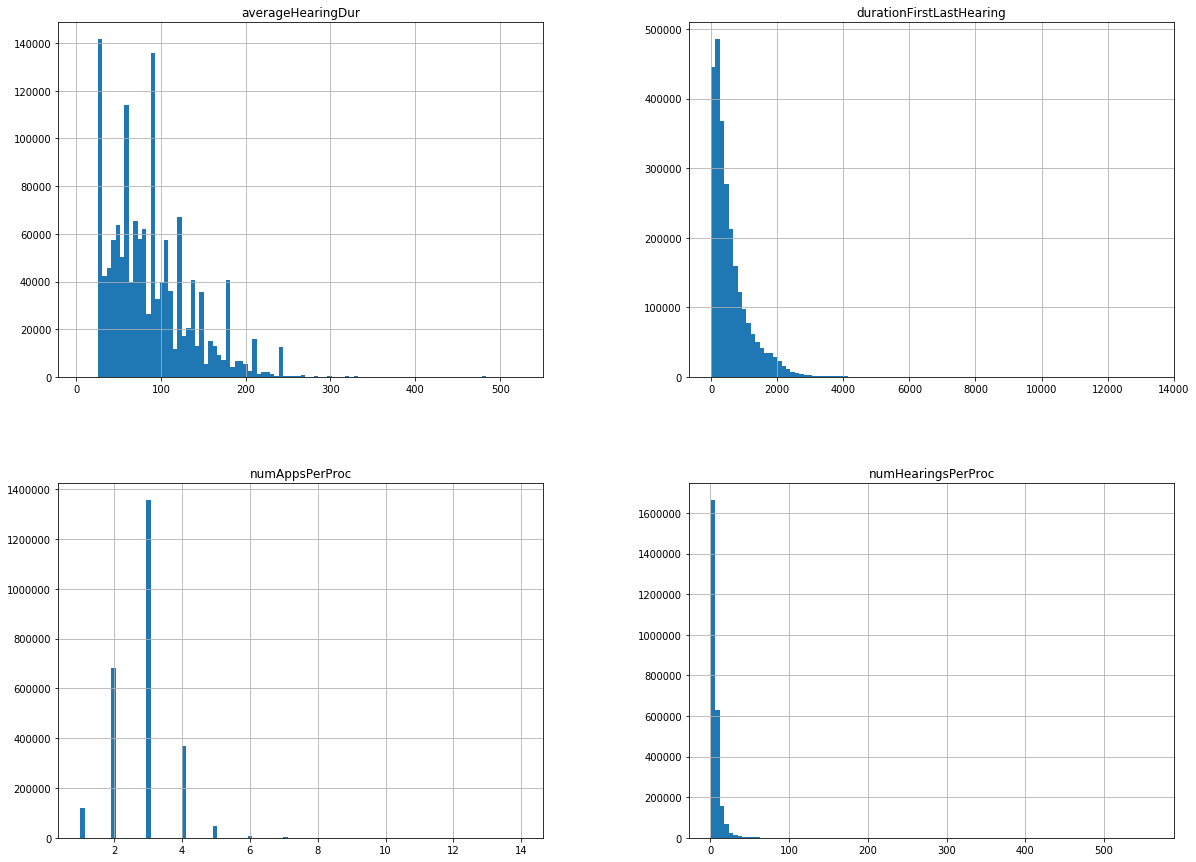

In [28]:
merged_sched_master.hist(bins=100, column=['numAppsPerProc', 'numHearingsPerProc', 'durationFirstLastHearing', 'averageHearingDur'], figsize=(20, 15))
plt.show()

## Selecting the last hearing for each idncase

In [29]:
merged_sched_master = merged_sched_master.groupby(['idncase', 'idnproceeding'], as_index=False).last()

## Histogram of numerical features

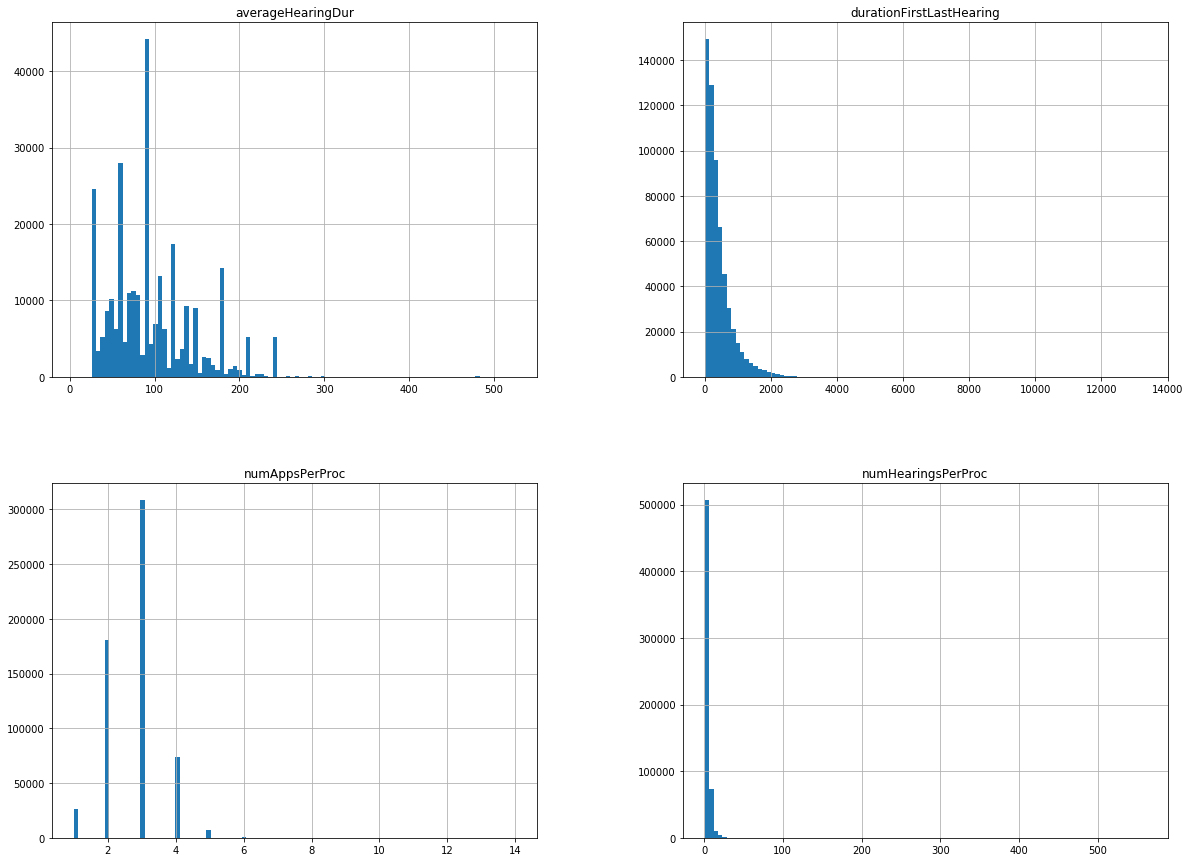

In [30]:
merged_sched_master.hist(bins=100, column=['numAppsPerProc', 'numHearingsPerProc', 'durationFirstLastHearing', 'averageHearingDur'], figsize=(20, 15))
plt.show()

## Average hearing duration v.s. grant rate

In [36]:
avgHDur_grantR = merged_sched_master[merged_sched_master.averageHearingDur <= 500]

In [37]:
avgHDur_grantR['rangeInc100'] = pd.cut(avgHDur_grantR['averageHearingDur'], np.arange(0, 500, 50))

/usr/local/anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
avgHDur_grantR = avgHDur_grantR.groupby(['averageHearingDur', 'dec'])['dec'].count()

In [34]:
avgHDur_grantR  = avgHDur_grantR.groupby(level=0).apply(lambda x: x / x.sum())

In [35]:
avgHDur_grantR.unstack().reset_index().plot(x='rangeInc100', y='GRANT', kind='bar', title='Average Hearing Duation v.s. Grant Rate')

KeyError: 'rangeInc100'

## Number of applications/proceeding v.s grant rate

In [ ]:
numApp_grantRate = merged_sched_master.groupby(['numAppsPerProc', 'dec'])['dec'].count()

In [ ]:
numApp_grantRate = numApp_grantRate.groupby(level=0).apply(lambda x: x / x.sum())
numApp_grantRate

In [ ]:
numApp_grantRate.unstack().reset_index().plot(x='numAppsPerProc', y='GRANT', kind='bar', title='Number of Applications/Proc v.s. Grant Rate')

## Number of days elapsed between first and last hearing v.s grant rate

In [ ]:
# getting rid of the rows where days elapsed is greater than 2000
durationFirstLastHearing_grantR = merged_sched_master[merged_sched_master.durationFirstLastHearing < 2000]

In [ ]:
# binning days elapsed into incremental periods of 3 months 
durationFirstLastHearing_grantR['rangeInc90'] = pd.cut(durationFirstLastHearing_grantR['durationFirstLastHearing'], np.arange(0, 2000, 90))

In [ ]:
durationFirstLastHearing_grantR = durationFirstLastHearing_grantR.groupby(['rangeInc90', 'dec'])['dec'].count()

In [ ]:
durationFirstLastHearing_grantR = durationFirstLastHearing_grantR.groupby(level=0).apply(lambda x: x / x.sum())

In [ ]:
durationFirstLastHearing_grantR

In [ ]:
durationFirstLastHearing_grantR.unstack().reset_index().plot(x='rangeInc90', y='GRANT', kind='bar', title='Number of Days Elapsed Between First and Last Hearing v.s. Grant Rate')

## Number of hearings/proceeding v.s. grant rate

In [ ]:
# getting rid of rows where there are more than 20 hearings 
numHearing_grantR = merged_sched_master[merged_sched_master.numHearingsPerProc < 20]

In [ ]:
numHearing_grantR = numHearing_grantR.groupby(['numHearingsPerProc', 'dec'])['dec'].count()

In [ ]:
numHearing_grantR = numHearing_grantR.groupby(level=0).apply(lambda x: x / x.sum())

In [ ]:
numHearing_grantR.unstack().reset_index().plot(x='numHearingsPerProc', y='GRANT', kind='bar', title='Number of Hearings/Proceeding v.s. Grant Rate')

In [ ]:
sched_tbl = pd.read_csv(path + '/tbl_schedule.csv', low_memory=False)

In [ ]:
sched_tbl.head(5)